# Exercise genetic algorithms

## Part I
Script sourced from `GA.R`

generation: 50 
mean top fitness: 255 
mean fitness 254.5 


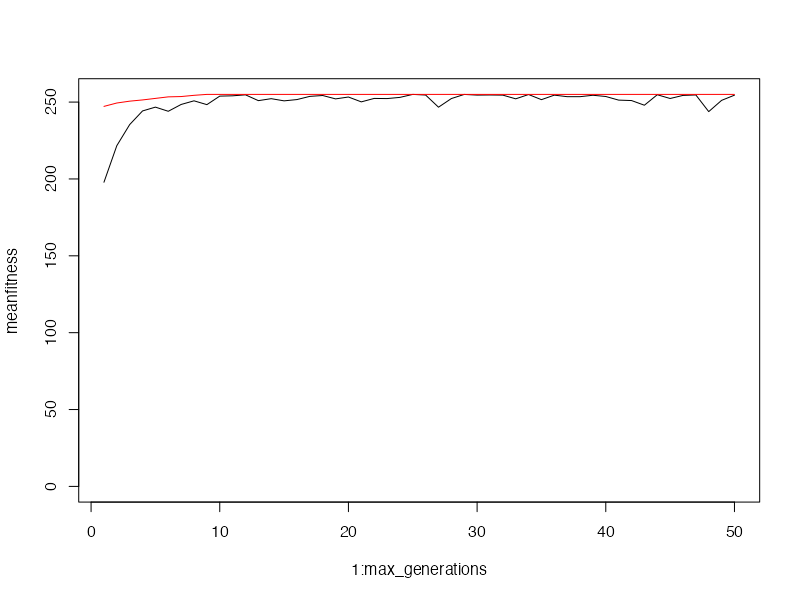

In [42]:
# exercise written 14 August 2006 by Anders Brodin translated into R by John Waller 2016. Further revised in 2018-20 by Jörgen Ripa

# Main variables:
pop_size <- 50            # popsize is number of chromosomes in the population
gene_number <- 8         # gene number is number of genes in each chromosome, should be one in these simple tasks
max_generations <- 50    # number of iterations
num_breeed <- 20          # out of the 50 chromosomes (= possible solutions) the 20 best are allowed to reproduce

# genetic operators
mutation_rate <- 0.01    #how large percentage of the genes experience mutations
mutation_free <- 0      # number of top ranked individuals that should be saved from mutation


# Define Functions

Create_pop <- function(pop_size,gene_number) {    # This function creates a random population of pop_size chromosomes
  
  Genes <- matrix(nrow=pop_size, ncol=gene_number)
  for(ind in 1:pop_size) {              # For each individual:
    for(gene_index in 1:gene_number) {      # For each gene in the chromosome
      if(runif(1) < 0.5) {                   # fill genes with either 0 or 1
        Genes[ind,gene_index] <- 0            
      } else {                        
        Genes[ind,gene_index] <- 1           
      }
    }
  }
  fitness <- rep(NA,pop_size)
  # pop is a list, a structured variable with information about the population:
  pop <- list(size=pop_size, L=gene_number, Genes=Genes, fitness=fitness)
  return(pop) 
}

# Function to calculate fitness for each individual:
Evaluate_fitness <- function(pop) {
  for(ind in 1:pop$size) {
    # Calculate the binary number corresponding to the chromosome of ones and zeros:
    Binary_Value <- 0;
    for(gene_index in gene_number:1) {
      if(pop$Genes[ind,gene_index] == 1) {
        Binary_Value <- Binary_Value + 2^(gene_number - gene_index)
      }
    }
    pop$fitness[ind] <- Binary_Value
  }
  return(pop)
}

# Sort the population by fitness:
Sort <- function(pop) {
  # Find order of decreasing fitness:
  new_order <- order(pop$fitness, decreasing=TRUE)
  # Next, rearrange the population gene matrix and fitness vector:
  pop$Genes <- pop$Genes[new_order,]
  pop$fitness <- pop$fitness[new_order]
  return(pop)
}

# Let individuals with the highest fitness reproduce:
Reproduce <- function(pop,num_breeed) {
  # The population reproduces in pairs, in fitness order
  # First individuals 1 and 2 mate, next individuals 3 and 4, and so on
  # Each pair produces 2 offspring, corresponding to two chromosomes after crossover
  # Offspring replace the parent population from the bottom of the list.
  offspring_pos <- pop$size # where to put the offspring, starting from bottom
  for(parent1 in seq(1,num_breeed,by=2)) {
    parent2 <- parent1 + 1
    # crossover locus:
    crossover <- sample.int(gene_number,1)
    for(gene_index in 1:pop$L) {
      if(gene_index <= crossover) {
        pop$Genes[offspring_pos,gene_index] <- pop$Genes[parent1,gene_index]
        pop$Genes[offspring_pos-1,gene_index] <- pop$Genes[parent2,gene_index]
      } else {
        pop$Genes[offspring_pos,gene_index] <- pop$Genes[parent2,gene_index]
        pop$Genes[offspring_pos-1,gene_index] <- pop$Genes[parent1,gene_index]
      }
    }
    offspring_pos <- offspring_pos - 2
  }
  return(pop)
}

# Mutate the whole population, accept the top fitness individuals
Mutate <- function(pop, mutation_free, mutation_rate) {
  for(ind in (mutation_free+1):pop$size) {
    for(gene_index in 1 : pop$L) {
      if(runif(1) <= mutation_rate) {
        if(pop$Genes[ind,gene_index] == 0) {
          pop$Genes[ind,gene_index] <- 1
        } else {
          pop$Genes[ind,gene_index] <- 0
        }
      }
    }
  }
  return(pop)
}

##############################
# Main program starts here

pop <- Create_pop(pop_size,gene_number)  # calls function that generates random chromosomes
pop <- Evaluate_fitness(pop)   # calculate fitness for all individuals
pop <- Sort(pop) # Sort according to fitness

# main loop over all of our functions

meantopfitness <- c(0,max_generations) # empty vectors to store results
meanfitness <- c(0,max_generations)

for(generation in 1:max_generations) {  
  pop <- Reproduce(pop,num_breeed)
  pop <- Mutate(pop, mutation_free, mutation_rate)
  pop <- Evaluate_fitness(pop)   # give back altered population with fitness
  pop <- Sort(pop)
  
  # save statistics:
  meantopfitness[generation] <- mean(pop$fitness[1:5])
  meanfitness[generation] <- mean(pop$fitness)
}

cat("generation:",max_generations,"\n")
cat("mean top fitness:",meantopfitness[max_generations],"\n")
cat("mean fitness",meanfitness[max_generations],"\n")

# plot results
plot(1:max_generations, meanfitness, ylim=c(0,max(meantopfitness)),type="l")
lines( 1:max_generations, meantopfitness, col="red")



In [4]:
# Make population with fitness scores
pop <- Evaluate_fitness(Create_pop(pop_size, gene_number))
pop

$size
[1] 50

$L
[1] 8

$Genes
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
 [1,]    1    1    1    0    1    1    1    1
 [2,]    0    0    0    0    1    0    1    1
 [3,]    0    1    0    1    0    0    1    0
 [4,]    1    1    1    0    1    0    0    1
 [5,]    1    0    1    0    0    1    0    1
 [6,]    1    0    1    1    0    1    0    0
 [7,]    0    1    1    1    0    0    0    0
 [8,]    1    1    1    1    1    1    0    1
 [9,]    1    1    1    0    0    1    1    1
[10,]    0    1    1    0    0    1    0    0
[11,]    1    1    0    0    1    1    0    0
[12,]    1    0    0    0    1    1    0    1
[13,]    0    1    0    1    0    0    1    1
[14,]    0    0    1    0    0    0    0    1
[15,]    0    1    0    1    1    0    1    1
[16,]    1    0    1    1    1    0    0    1
[17,]    1    0    0    1    1    0    0    1
[18,]    0    0    0    1    0    1    1    0
[19,]    1    0    0    0    1    1    0    0
[20,]    0    1    1    1    1    0    0    0
[21

Here's how a number is represented in binary:

$$
1 \Rightarrow 2^{1-1} = 1 \\
10 \Rightarrow 0 + 2^{2-1} = 2 \\
11 \Rightarrow 2^{1-1} + 2^{2-1} = 3 \\
100 \Rightarrow 0 + 0 + 2^{3-1} = 4 \\
1010101 \Rightarrow 2^{7-1} + 0 + 2^{5-1} + 0 + 2^{3-1} + 0 + 2^{1-1} = 85
$$

In [60]:
# Calculate fitness of one individual
fit_one <- function(individual) {
  bin_val <- 0
  for (i in length(individual):1) {
    if (individual[i] == 1) {
      bin_val <- bin_val + 2 ** (length(individual) - i)
    }
  }
  return(bin_val)
}

# fit_one(c(rep(1, 1), rep(0, 7)))
fit_one(c(1, 0, 1, 0, 1, 0, 1))

[1] 85

## Part II

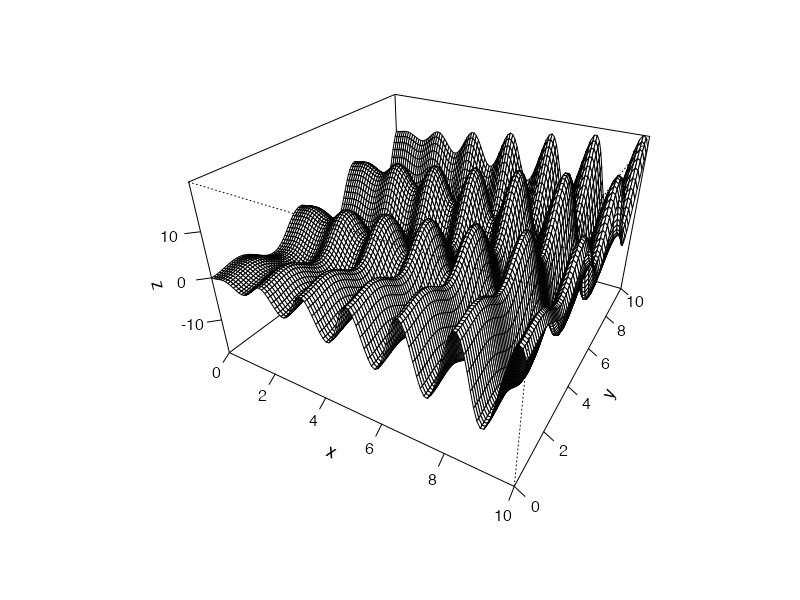

In [62]:
f <- function(x,y) x*sin(4*x)+1.1*y*sin(2*y)
x <- seq(0,10, length=101)
y <- seq(0,10, length=101)
z <- outer(x,y,f) # calculate f(x,y) for each value of x and y
persp(x,y,z,theta=30, phi=30, expand=0.6, ticktype='detailed')